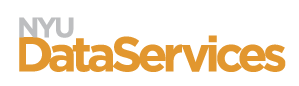

<br>
<h1><center>How to join tabular(CSV) data to a shapefile</center></h1>

<br>
<h2><left>GIS in Python: Table Join</left></h2>

Joining Tabular data to a shapefile allows you to add fields from your data table to a shapefile’s attribute table based on matching values found in the key columns, so that you may generate a choropleth map of your variable of interest. For example, you would like to locate which area in New York state has the largest concentration of African Americans living below the poverty level. However, you only have a New York state census tracts shapefile without the attribute field for the Black population below the poverty level and a tabular file including the poverty population data at census tract level downloaded from the U.S. Census. Let’s conduct this analysis using Python and the GeoPandas package. You can use the `read_file()` method from the geopandas package to read shapefile and use the `read_csv()` method from the pandas package to read the tabular dataset that you would like to join with the shapefile into Python. Then use the `merge()` method to join the tabular data with the shapefile based on common columns, and use the matplotlib to show a choropleth map of the interested variable. [Here is the data for this exercise.](https://drive.google.com/drive/folders/1SAnje5w2xWwwbvqjPPwmQq-pNKvADMhd?usp=sharing)

<br>
<h3><left>Part A: Install and Launch Jupyter Notebook via Anaconda</left></h3>

If you already have Anaconda downloaded and installed, you can skip Part A and directly start the analysis in Part B. Make sure you also have packages pandas, geopandas, matplotlib, descartes, and mapclassify installed in the environment where you would like to conduct this analysis.

1) First, download Anaconda. Anaconda is a free and open-source distribution of Python. You can use Anaconda to install IDEs (integrated development environments where you can write and run code) and packages like Pandas and Geopandas. Go to the link to download Anaconda, https://www.anaconda.com/products/individual, and then open the .exe file that was downloaded and follow the instructions in the installation wizard prompt. 
<br>

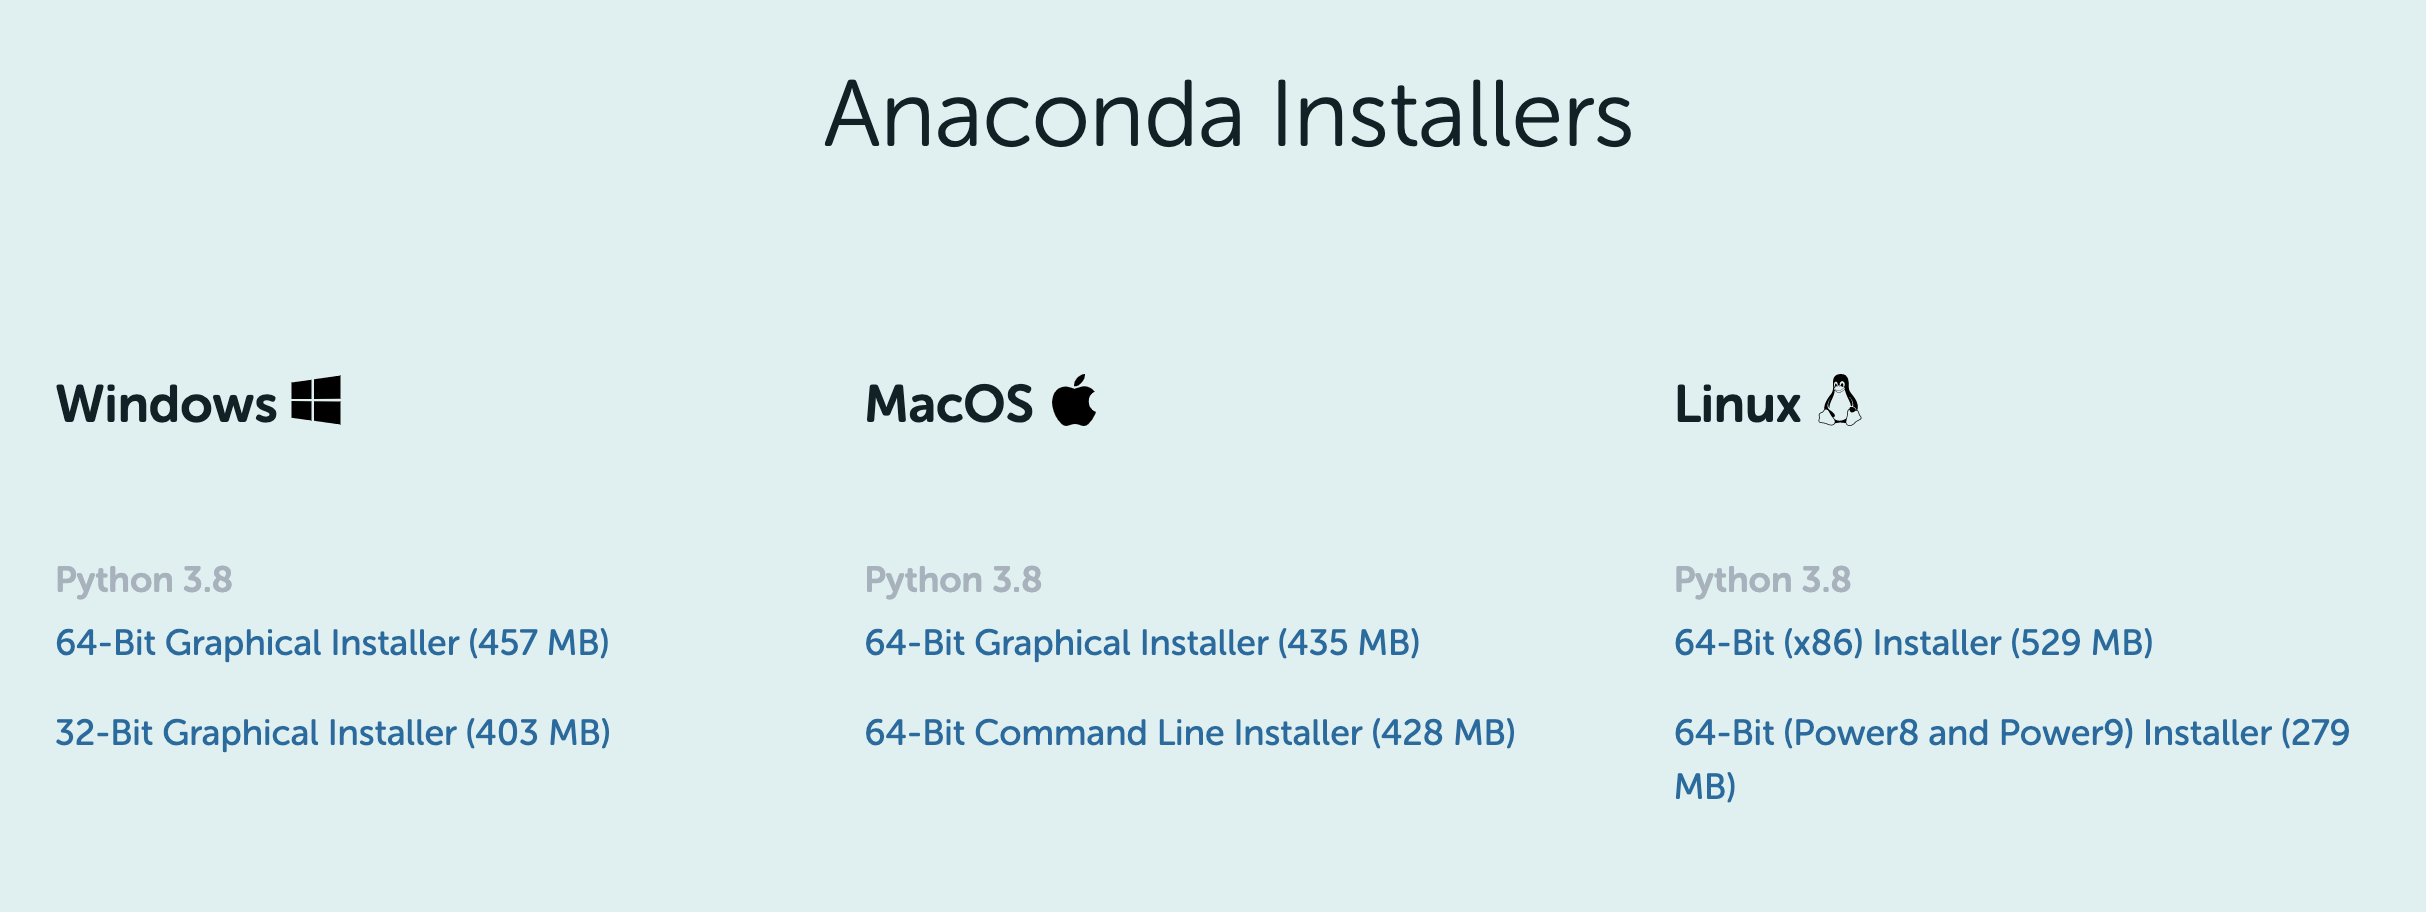

<br>
2) Once installation is complete, open Anaconda Navigator and create a new environment for your project. A Conda environment is a directory that contains a specific collection of Conda packages that you have installed. Conda has a default environment called 'base' that includes a Python installation and some core system libraries and dependencies of Conda. It is a “best practice” to avoid installing additional packages into your base environment, and, instead, create an isolated environment to manage packages and dependencies in a new project. 

Click on the Environments selection in the left sidebar menu and then click on the 'Create' at the bottom. This will open a dialog box prompting you to create a name for the new environment. You can give any name for your new environment. Here, we use 'GIS_in_Python' as the environment name. Then click the 'Create' button within the dialog box to finish the creation.
<br>

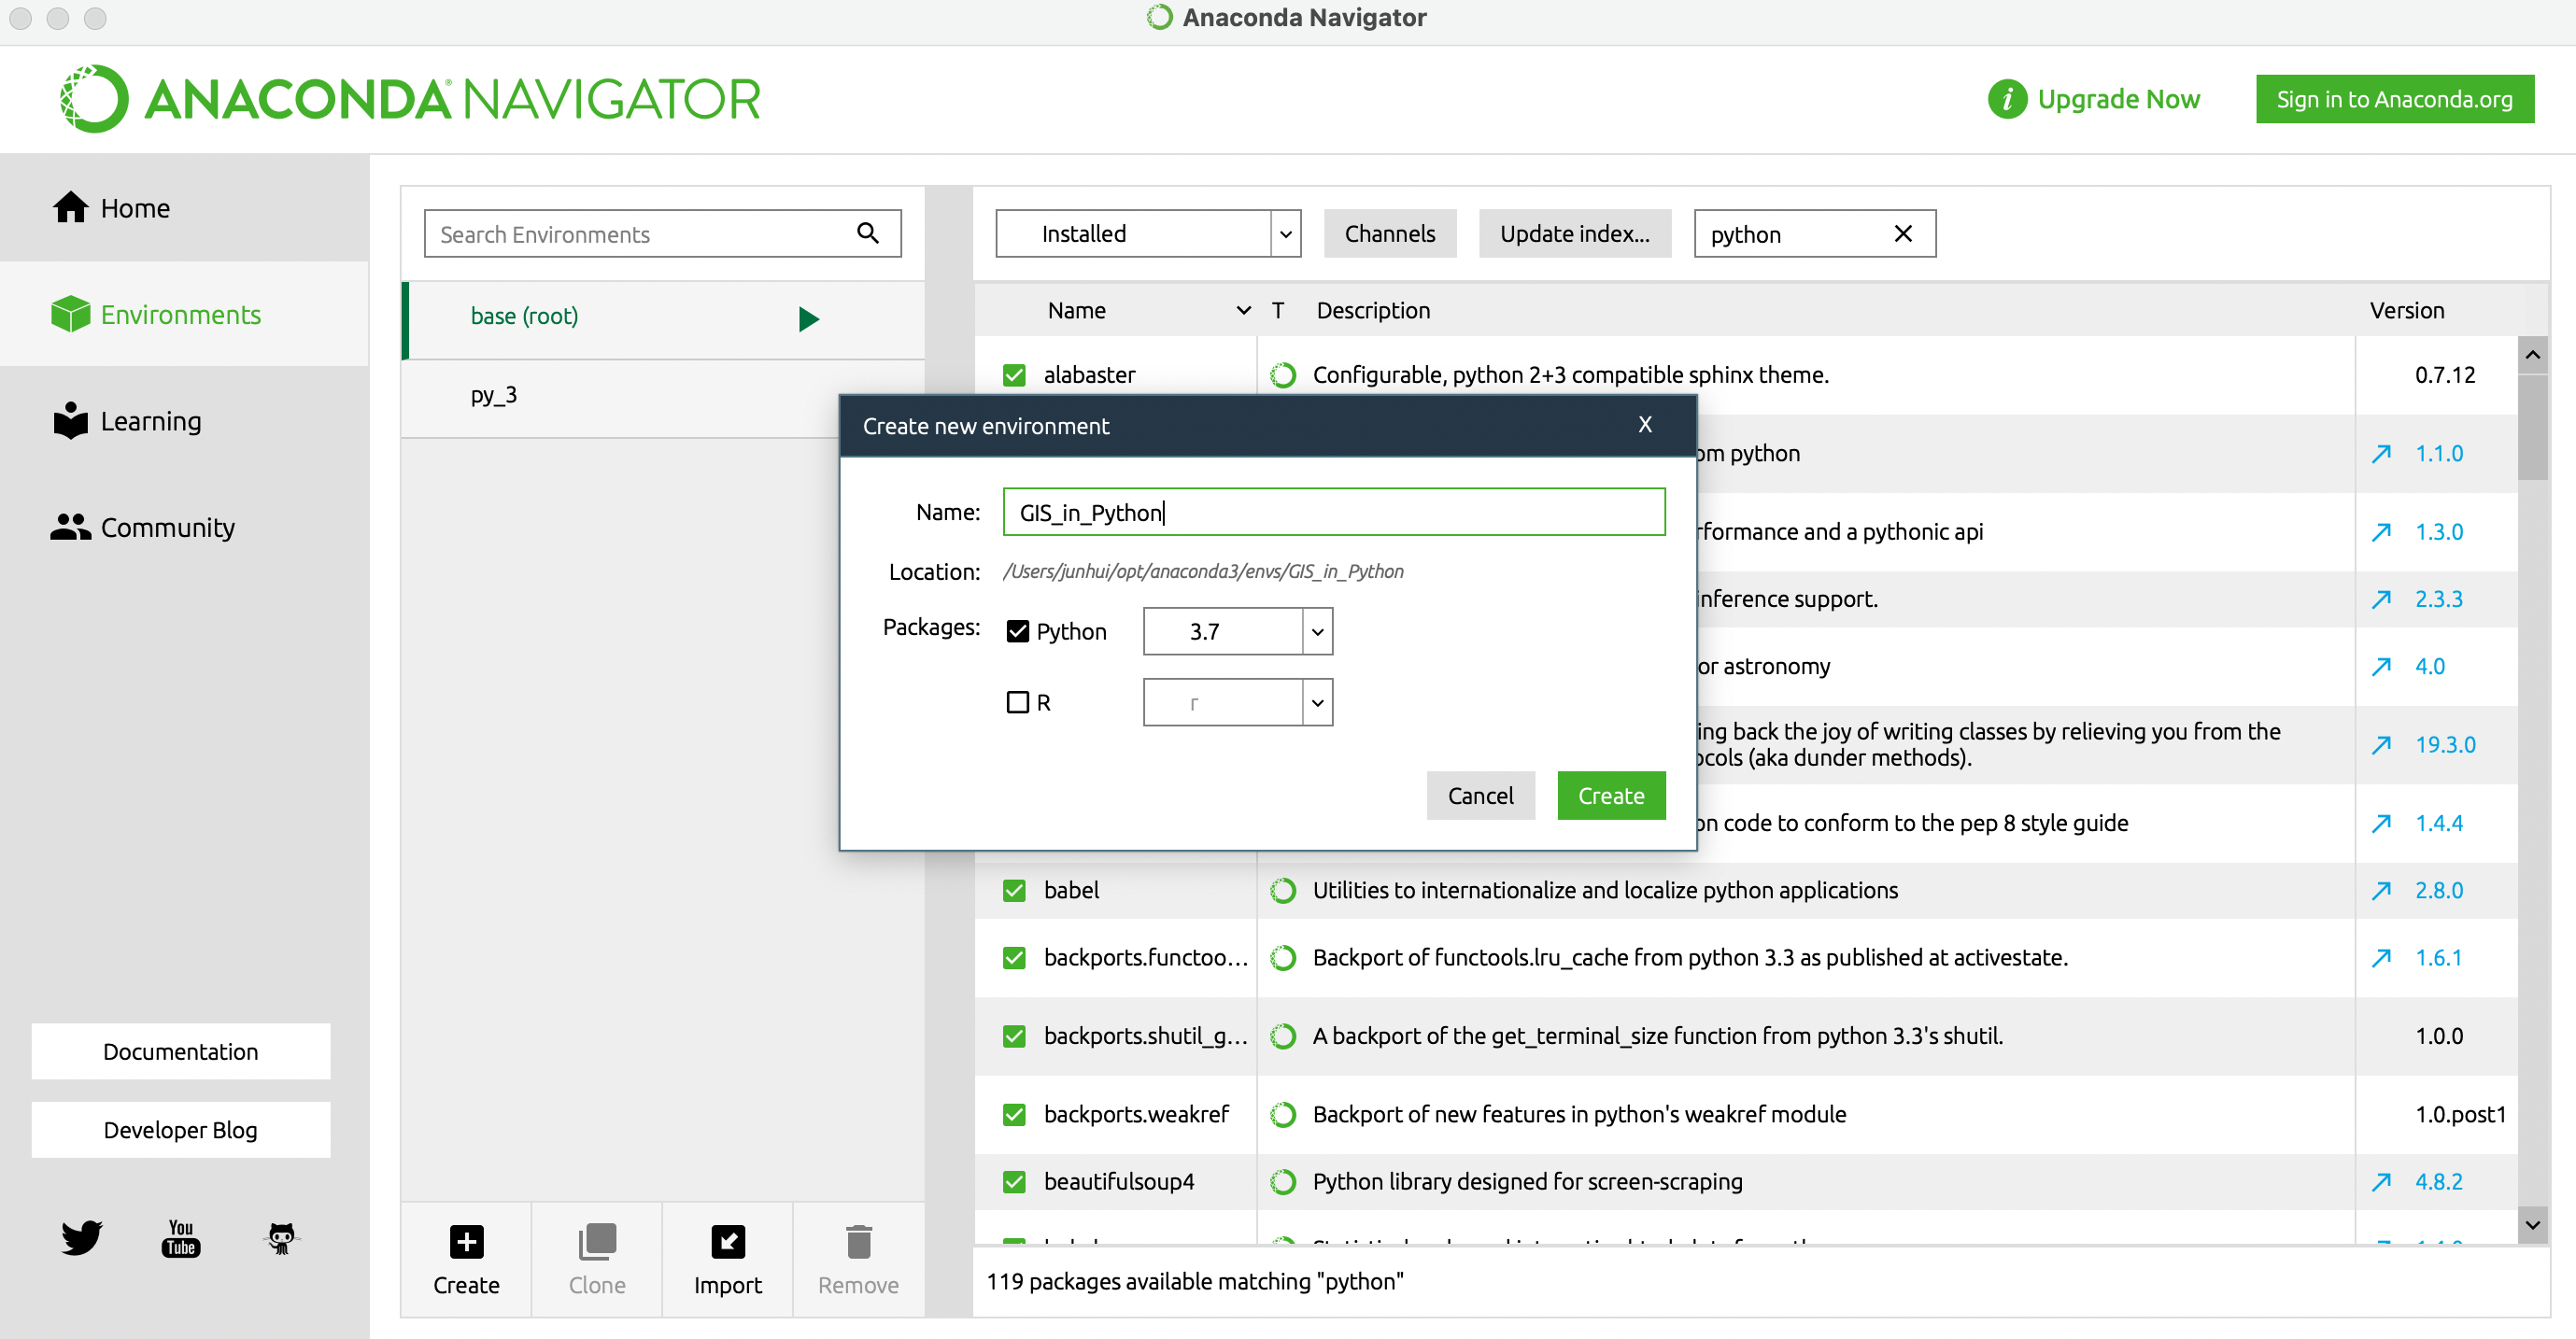

<br>
3) Once you have your project environment set up, click on the arrow to the right of your new environment, 'GIS_in_Python' in this example, and select Open Terminal. This will give you access to the command line interface on your computer in a window.
<br>

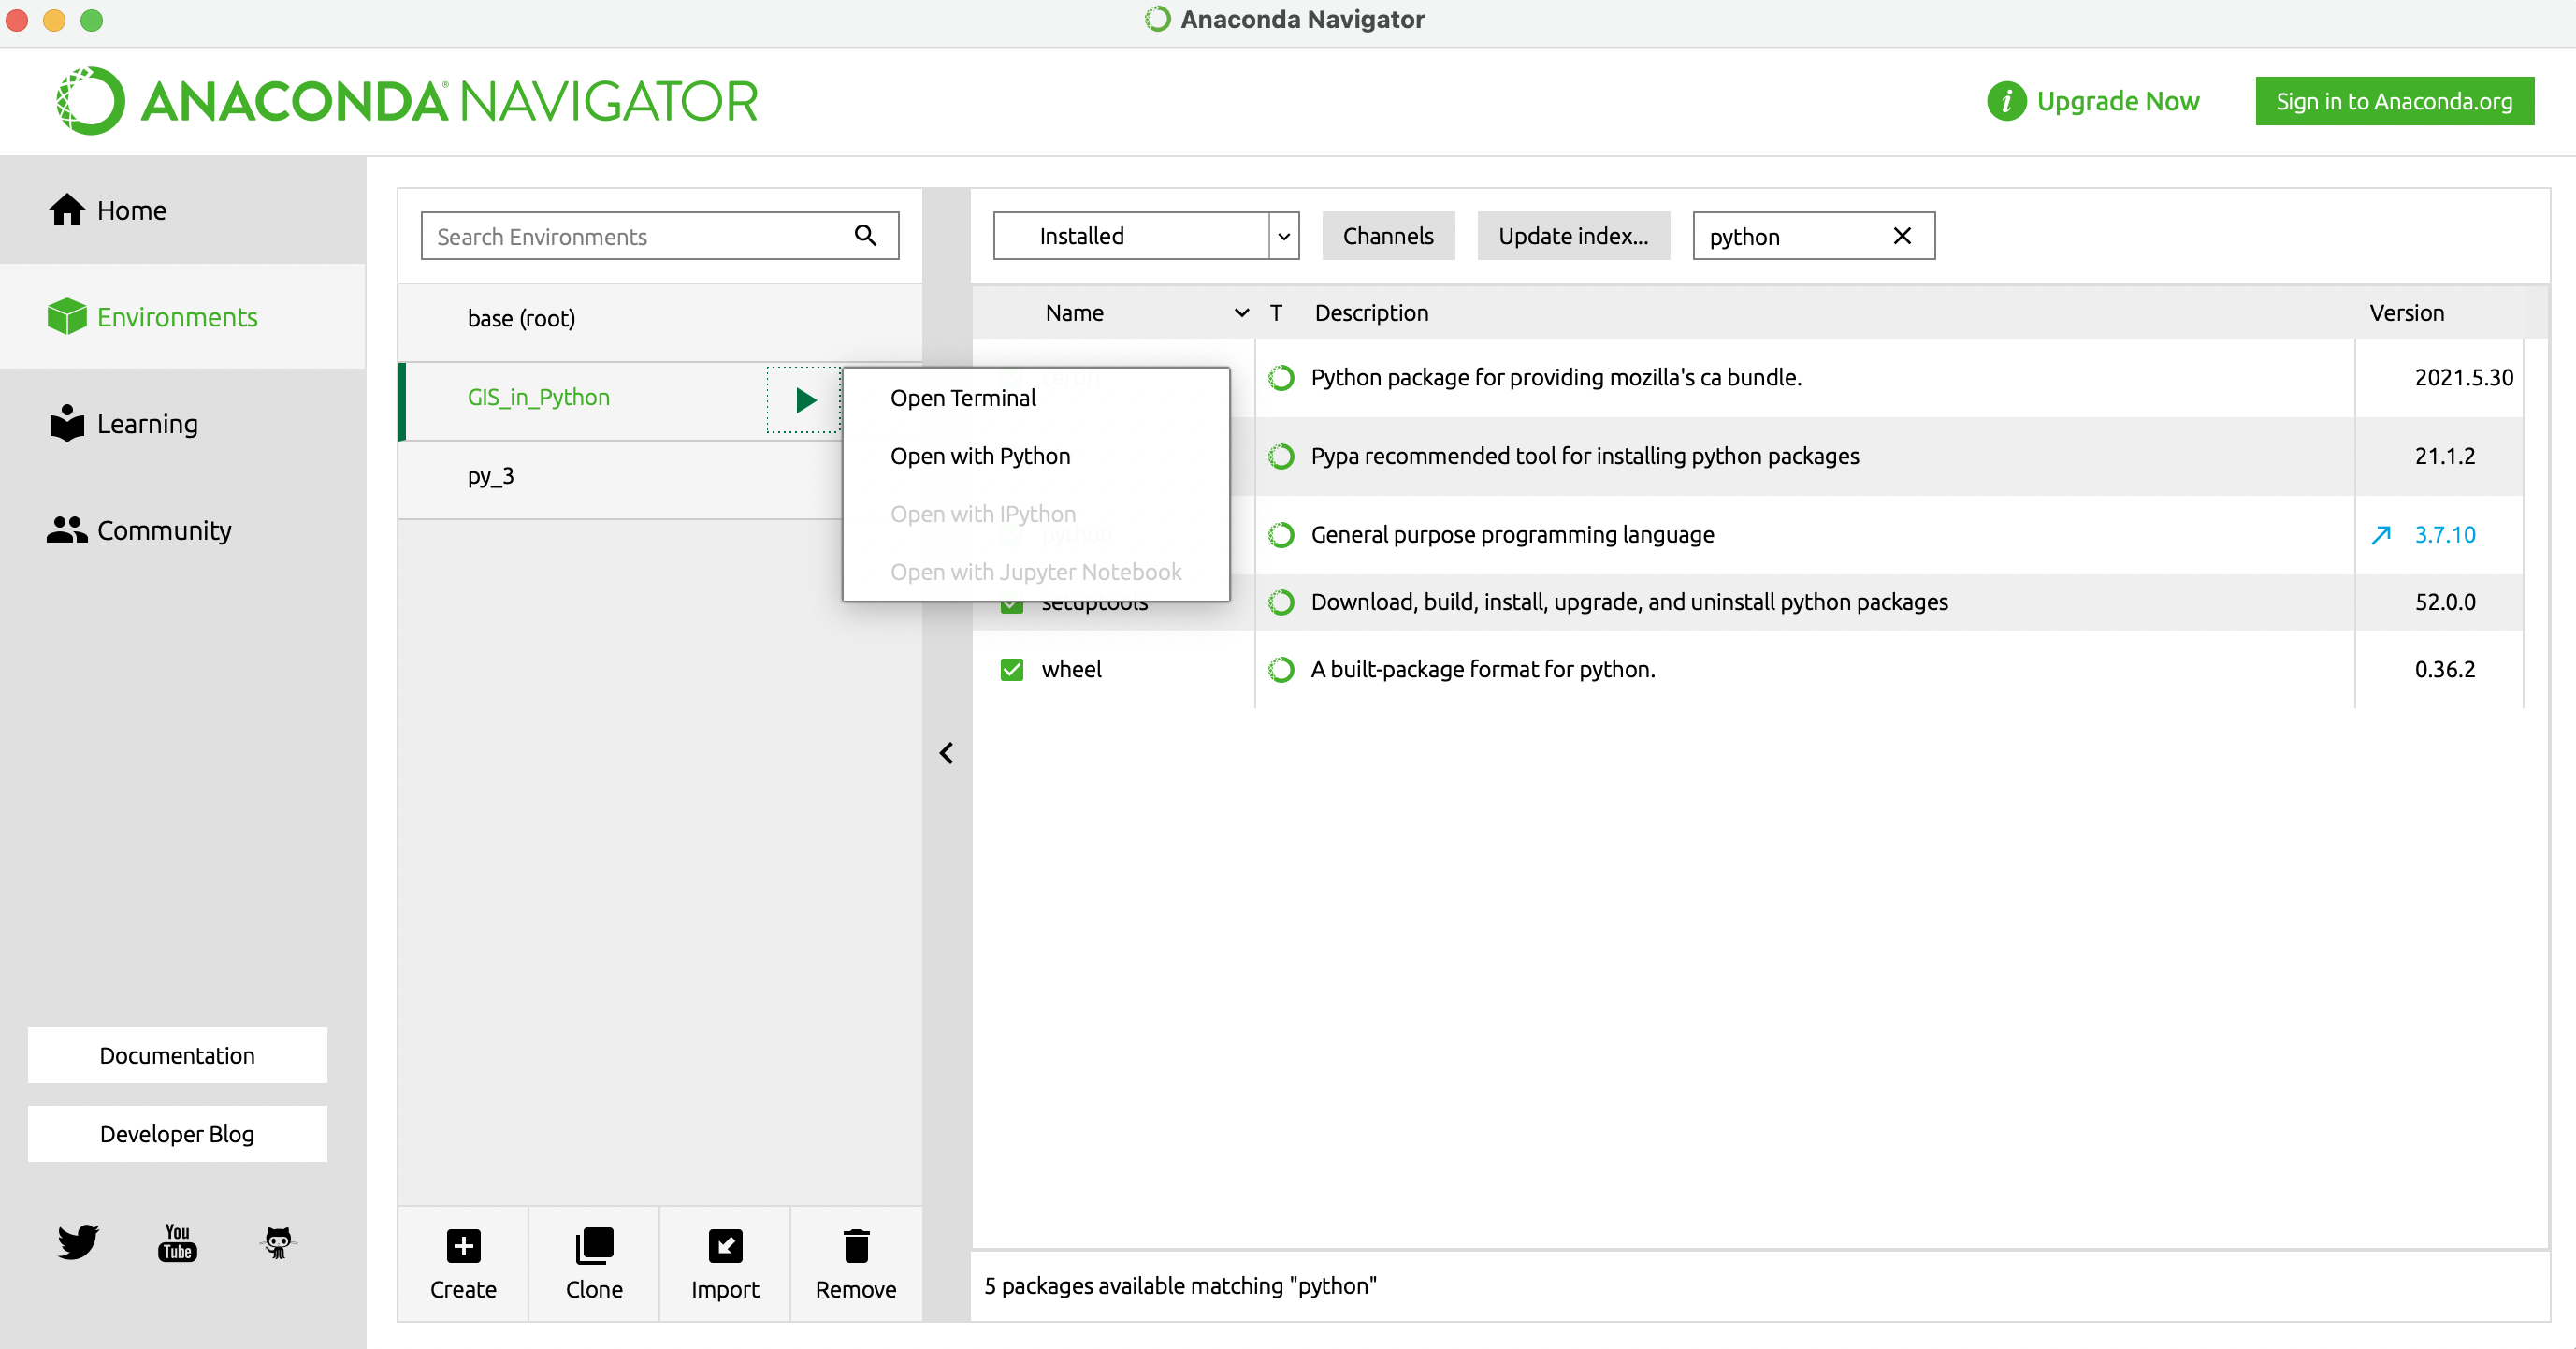

<br>
4) Install the packages/libraries necessary for the analysis by entering the following commands in the opened terminal, one line at a time:
<br>
conda install pandas
<br>
conda install geopandas
<br>
conda install matplotlib
<br>
conda install descartes
<br>
conda install mapclassify

<br>
5) Once you have those libraries all installed, select the new environment, 'GIS_in_Python' in this example, in the 'Applications on' dropdown menu, and then click "install" and "launch" under Jupyter Notebook. Jupyter Notebook will open in your web browser (it does not require the internet to work). 
<br>

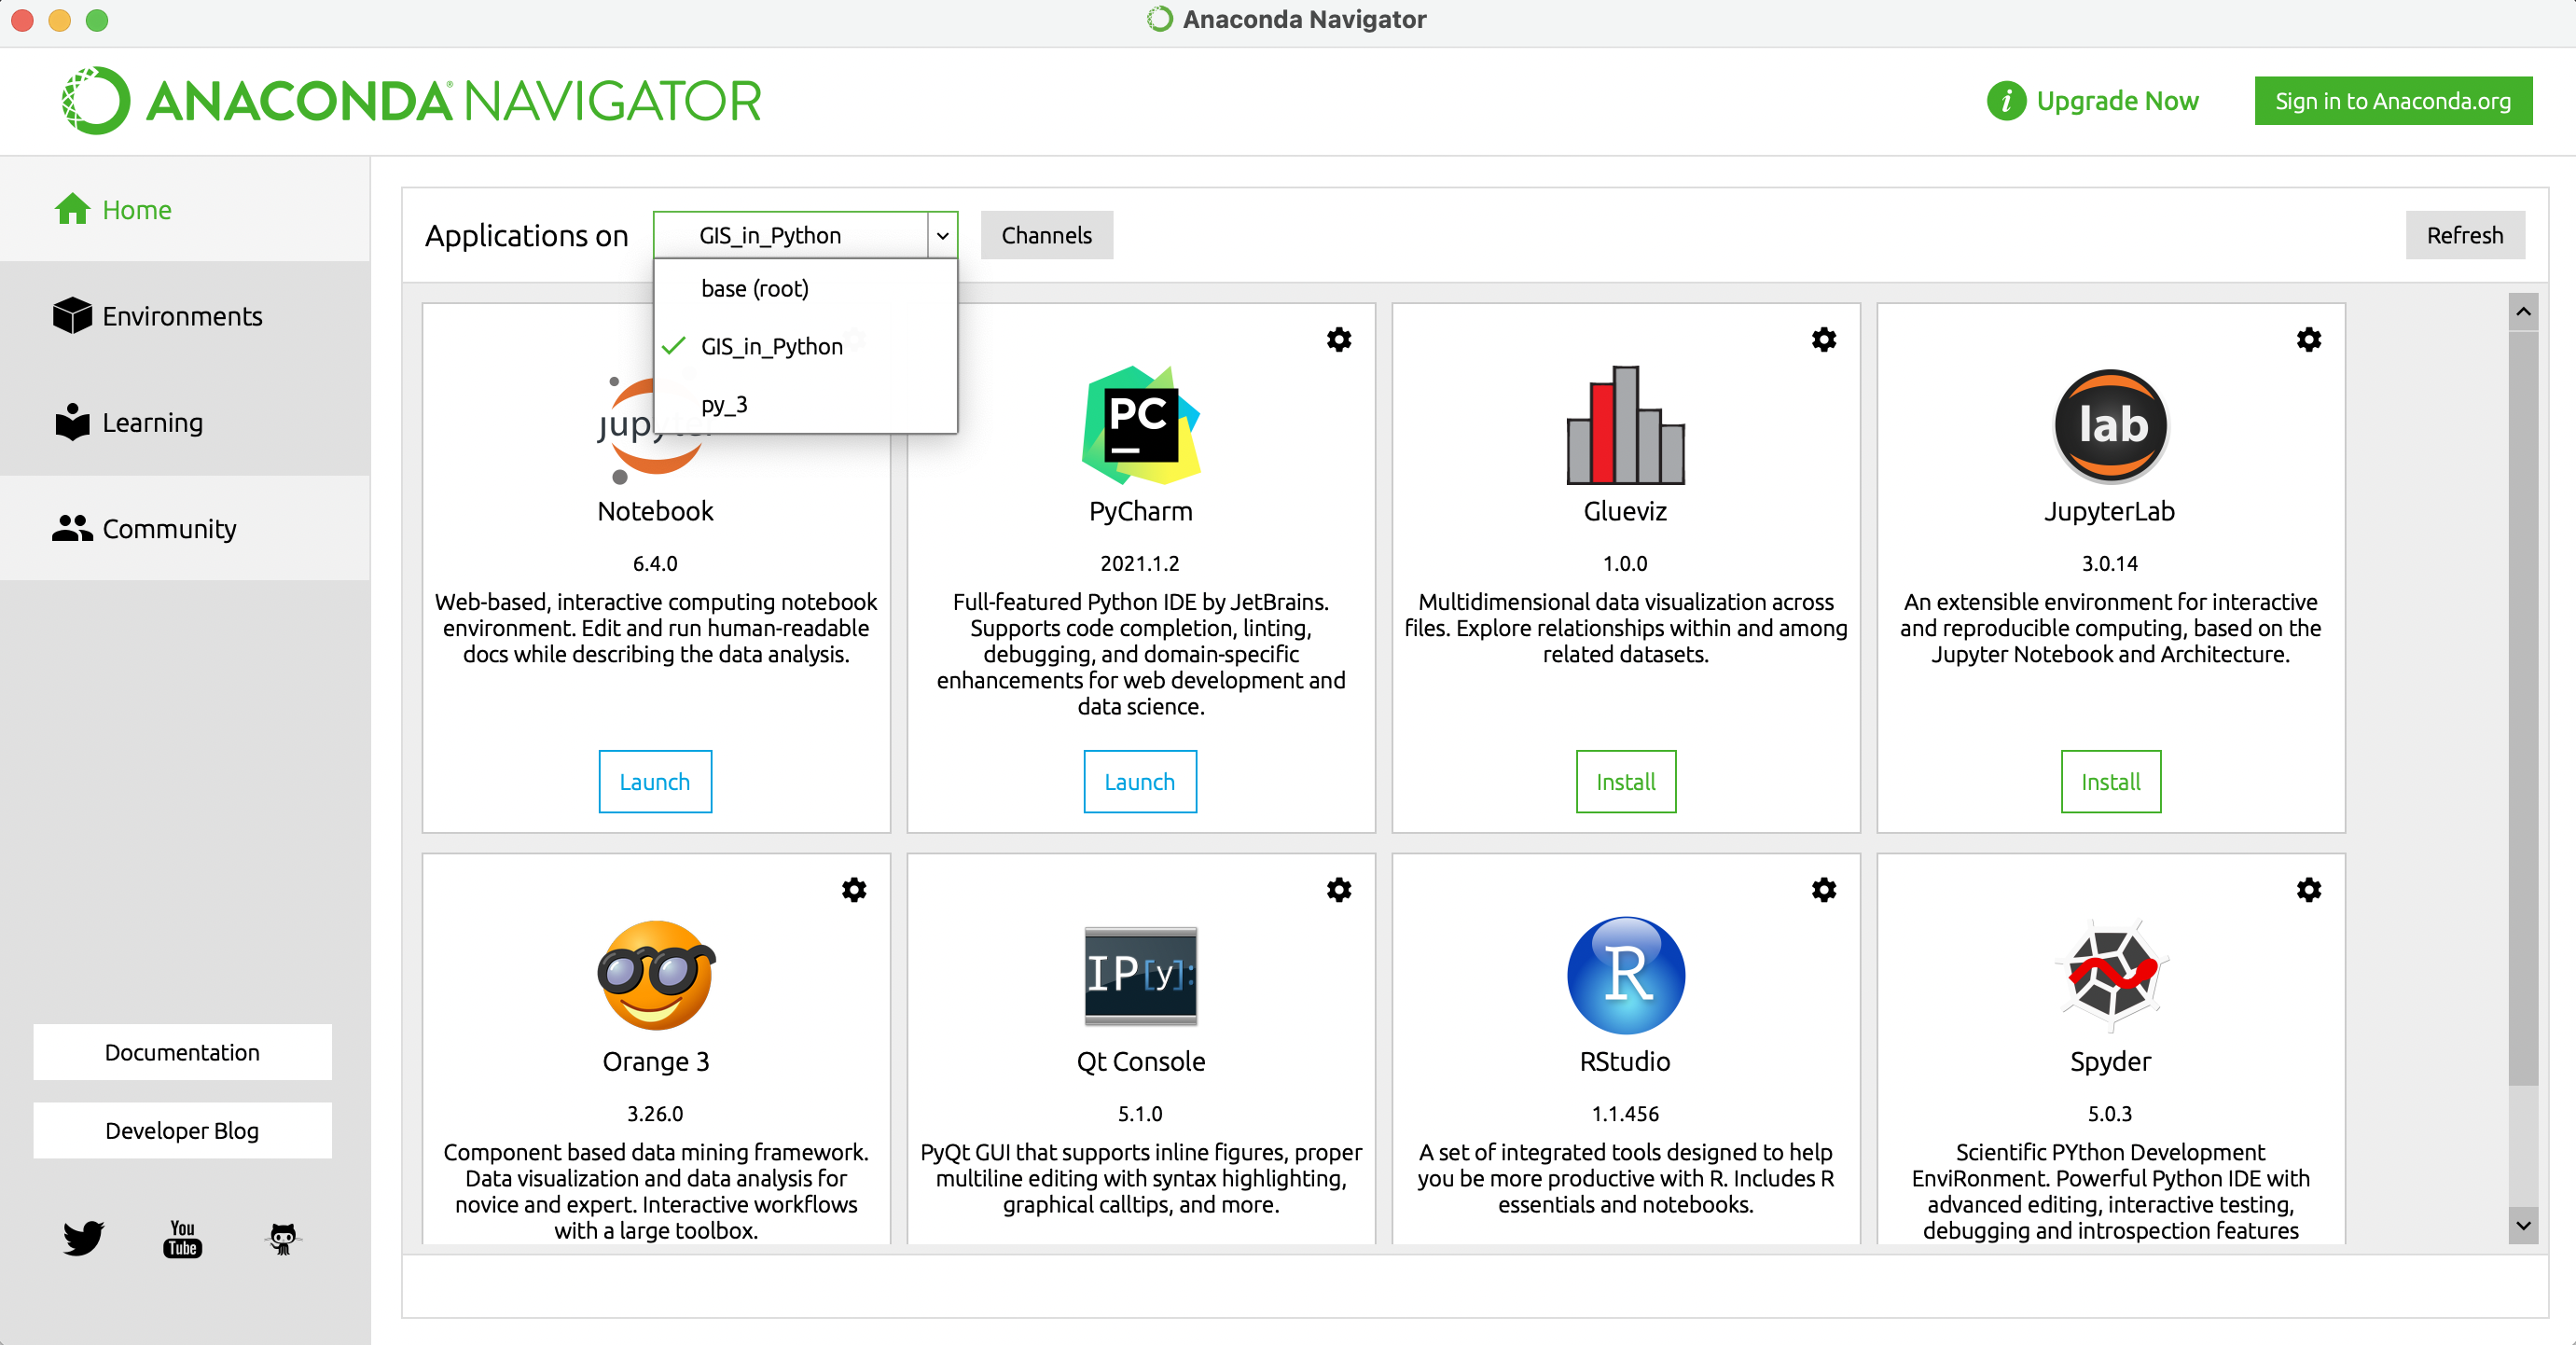

<br>
6) In Jupyter Notebook, navigate to the folder where you saved the code file you plan to use and open the .ipynb file (the extension for Jupyter Notebook files written in Python) to run it in the Notebook. If you would like to create a new .ipynb file, browse to the folder in which you would like to save your Notebook, then click the "New" dropdown button on the top-right and select "Python 3". Your new Notebook will open in a new tab in your browser. If you want to create a new directory using the Jupyter Notebook dashboard, click the "New" dropdown button and then select "Folder". To add files from your local machine, click the "Upload" button on the top-right to open a file chooser window and then choose the file you wish to upload.
<br>

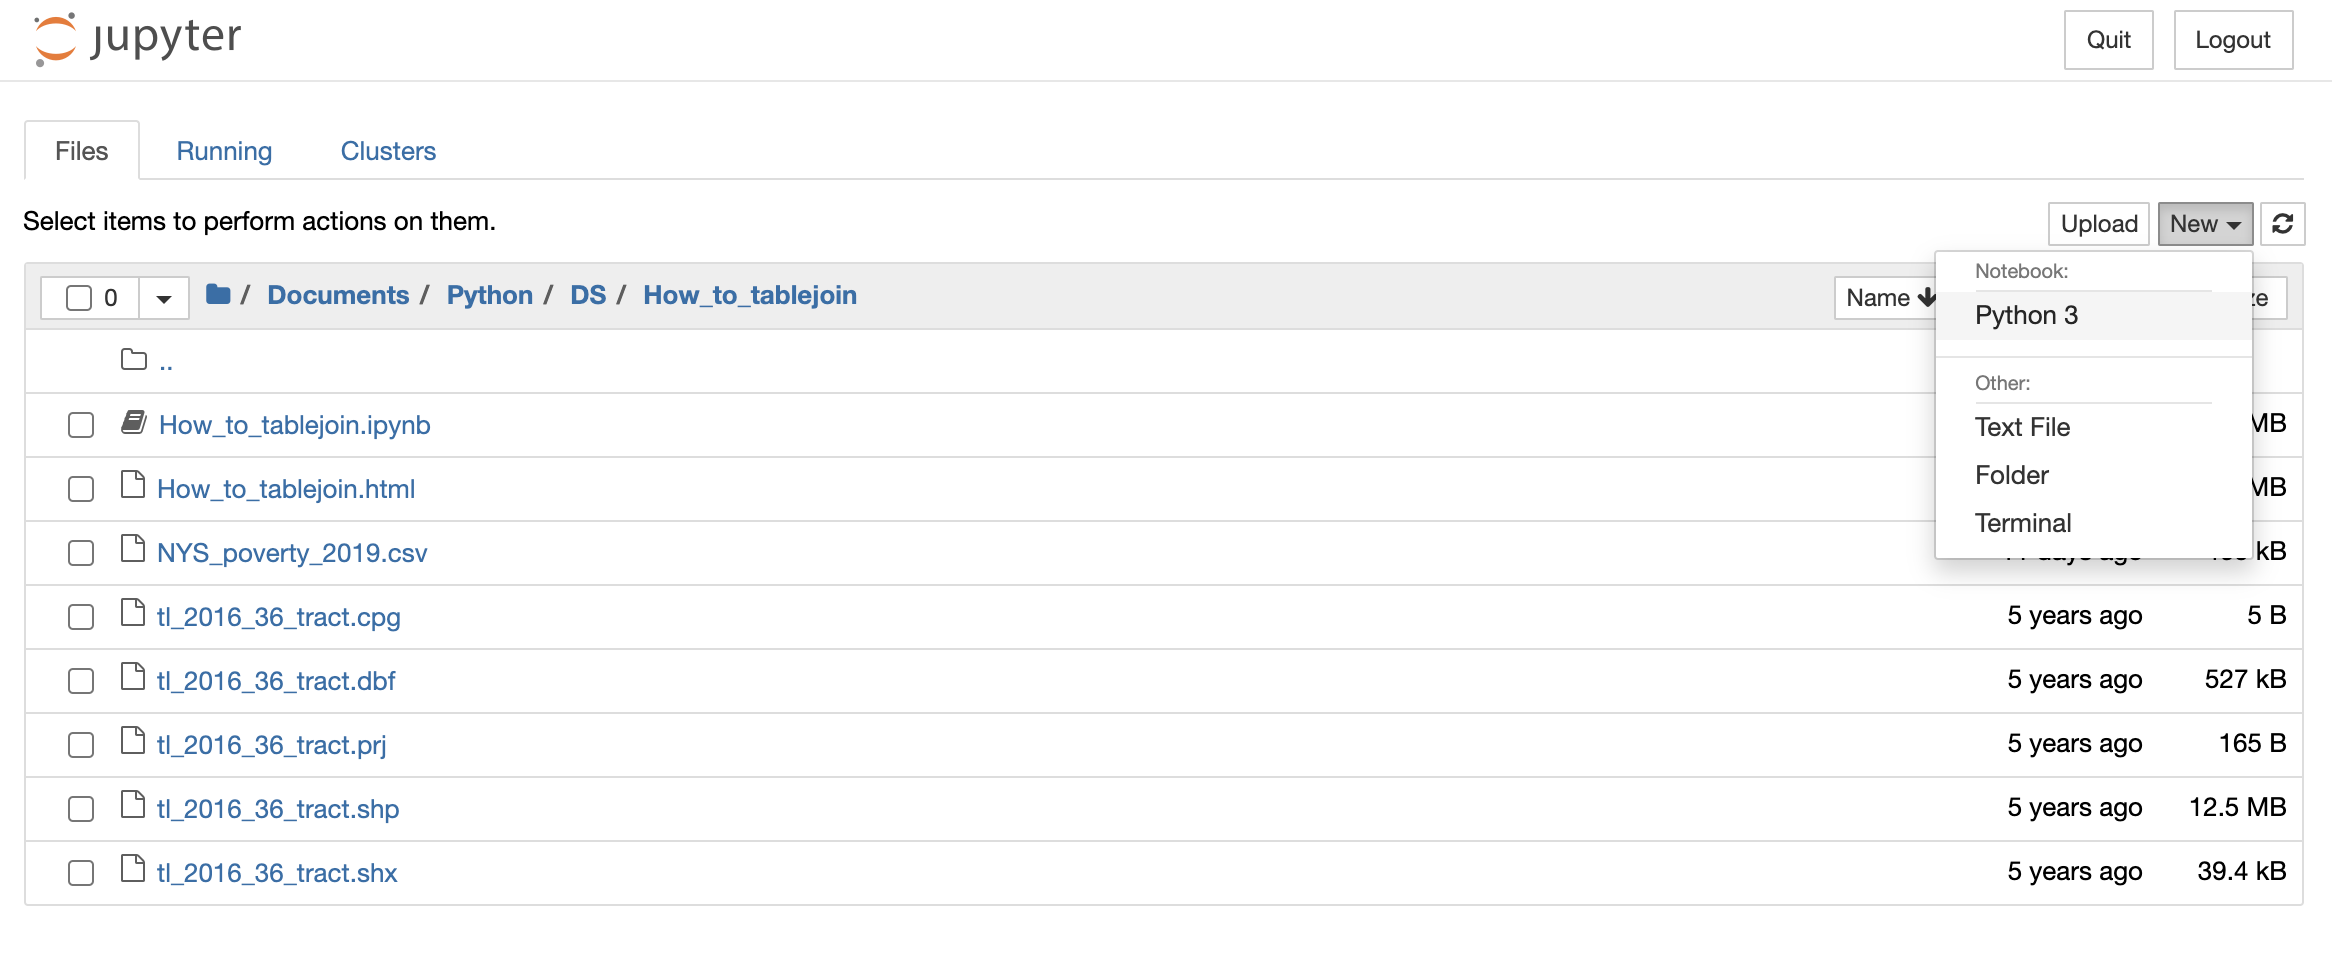

<br>
<h3><left>Part B: Read Data File and Perform a Table Join and other Spatial Analysis</left></h3>

1) Import necessary packages/libraries.
<br>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import descartes
import mapclassify

<br>
2) Use the `gpd.read_file()` function from the geopandas package to read the shapefile. Optionally, you can use the `head()` method to return the first 5 rows of the GeoDataFrame.
<br>

In [2]:
NYS_tracts = gpd.read_file("tl_2016_36_tract.shp")
NYS_tracts.head()

STATEFP COUNTYFP TRACTCE        GEOID    NAME             NAMELSAD  MTFCC  \
0      36      093  033102  36093033102  331.02  Census Tract 331.02  G5020   
1      36      093  020102  36093020102  201.02  Census Tract 201.02  G5020   
2      36      093  032504  36093032504  325.04  Census Tract 325.04  G5020   
3      36      081  003400  36081003400      34      Census Tract 34  G5020   
4      36      081  003900  36081003900      39      Census Tract 39  G5020   

  FUNCSTAT      ALAND   AWATER     INTPTLAT      INTPTLON  \
0        S  183329987  3232878  +42.7779982  -074.1727018   
1        S     854904        0  +42.8295375  -073.9161408   
2        S   66000589  1265253  +42.9010522  -074.0288926   
3        S     213987        0  +40.6847731  -073.8581871   
4        S     146970        0  +40.7627994  -073.9409316   

                                            geometry  
0  POLYGON ((-74.30655 42.75064, -74.30624 42.751...  
1  POLYGON ((-73.92513 42.82029, -73.92440 42.821...  
2  POLYGON ((-74.09298 42.95587, -74.08805 42.955...  
3  POLYGON ((-73.86629 40.68319, -73.86549 40.683...  
4  POLYGON ((-73.94330 40.76066, -73.94247 40.761...

<br>
You may also use matplotlib for plotting to generate an overview of your GeoDataFrame.

- The first line of code assigns a separate variable to each of the two results of plt.subplots(), "fig" short for figure, and "ax" short for axes.
    - Here, axes is synonymous with subplot. 
    - We define one Figure (fig) containing one Axes (a plot, ax), with the size of the plot specified by `figsize = (12,12)`, the first number corresponding to width, the X axis, and the second corresponding to height, the Y axis. 
- The second line generates a plot of the GeoDataFrame, 'NYS_tracts', with matplotlib; `ax = ax` sets axes on which to draw the plot.
<br>

<AxesSubplot:>

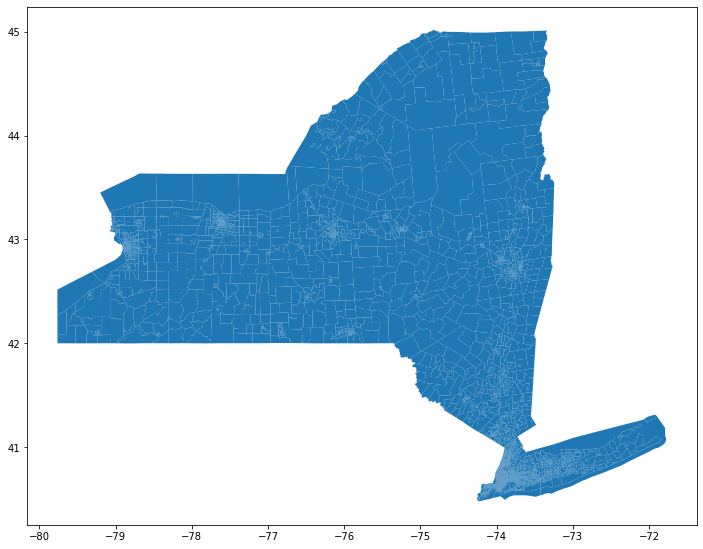

In [3]:
fig, ax = plt.subplots(figsize=(12, 12))
NYS_tracts.plot(ax=ax)

<br>
3) Use the `read_csv()` method from the pandas package to read the tabular dataset that you would like to join with the shapefile. Make sure the tabular dataset has at least one column in common with the shapefile so that you can use it as a key column to join the two. For our tutorial the key column is 'GEOID'. Optionally, you can use the `head()` method to return the first 5 rows of the DataFrame.
<br>

In [4]:
poverty = pd.read_csv("NYS_poverty_2019.csv")
poverty.head()

GEOID                        Geographic Area Name  \
0  36001000100     Census Tract 1, Albany County, New York   
1  36001000200     Census Tract 2, Albany County, New York   
2  36001000300     Census Tract 3, Albany County, New York   
3  36001000401  Census Tract 4.01, Albany County, New York   
4  36001000403  Census Tract 4.03, Albany County, New York   

   Population below poverty level - Total  \
0                                     502   
1                                    1641   
2                                    1359   
3                                     168   
4                                     456   

   Population below poverty level - White alone  \
0                                            54   
1                                            75   
2                                            57   
3                                           110   
4                                           187   

   Population below poverty level - Black or African American alone  \
0                                                430                  
1                                               1395                  
2                                                473                  
3                                                 44                  
4                                                155                  

   Population below poverty level - American Indian and Alaska Native alone  \
0                                                  0                          
1                                                  0                          
2                                                  0                          
3                                                 14                          
4                                                  0                          

   Population below poverty level - Asian alone  \
0                                             0   
1                                            36   
2                                           111   
3                                             0   
4                                            80   

   Population below poverty level - Native Hawaiian and Other Pacific Islander alone  \
0                                                  0                                   
1                                                  0                                   
2                                                  0                                   
3                                                  0                                   
4                                                  0                                   

   Population below poverty level - Some other race alone  
0                                                  0       
1                                                  0       
2                                                 64       
3                                                  0       
4                                                 17

<br>
4) Before joining, use the `dtypes` attribute to check if the data types of the common columns in the two data frames are the same and use the `astype()` method to convert data types to be the same if they are different. 
<br>In this example, 'GEOID' is the column we want to examine in the two datasets (NYS_tracts['GEOID'] and poverty['GEOID']) for their data types (.dtypes). The data type of 'GEOID' in the 'NYS_tracts' GeoDataFrame is 'object' which represents strings while the data type of GEOID in the 'poverty' DataFrame is 'int64', which means that the two columns aren’t compatible, so we must convert the data types. We convert 'GEOID' in the 'NYS_tracts' GeoDataFrame (NYS_tracts['GEOID']) from strings to integer (.astype('int64')).
<br>

In [5]:
print (NYS_tracts['GEOID'].dtypes)
print(poverty['GEOID'].dtypes)

object
int64


In [6]:
NYS_tracts['GEOID'] = NYS_tracts['GEOID'].astype('int64')
print (NYS_tracts['GEOID'].dtypes)

int64


<br>
5) Once you’ve had shapefile and tabular data both ready in the session, you can use the `merge()` method to join the two datasets based on the field that is common to both. In this example, the GeoDataFrame 'NYS_tracts' is joined with the pandas DataFrame 'poverty' based on the common variable 'GEOID'. 

- The `merge()` method is called from the spatial dataset ('NYS_tracts').
- The first argument in the `merge()` specifies the tabular data we want to attach ('poverty').
- The second argument preceded by "on" ensures that it’s merged by the column common to the both datasets (on='GEOID').

Optionally, you can use the `head()` method to return the first 5 rows of the 'join' GeoDataFrame.
<br>

In [7]:
join = NYS_tracts.merge(poverty, on='GEOID')
join.head()

STATEFP COUNTYFP TRACTCE        GEOID    NAME             NAMELSAD  MTFCC  \
0      36      093  033102  36093033102  331.02  Census Tract 331.02  G5020   
1      36      093  020102  36093020102  201.02  Census Tract 201.02  G5020   
2      36      093  032504  36093032504  325.04  Census Tract 325.04  G5020   
3      36      081  003400  36081003400      34      Census Tract 34  G5020   
4      36      081  003900  36081003900      39      Census Tract 39  G5020   

  FUNCSTAT      ALAND   AWATER  ...      INTPTLON  \
0        S  183329987  3232878  ...  -074.1727018   
1        S     854904        0  ...  -073.9161408   
2        S   66000589  1265253  ...  -074.0288926   
3        S     213987        0  ...  -073.8581871   
4        S     146970        0  ...  -073.9409316   

                                            geometry  \
0  POLYGON ((-74.30655 42.75064, -74.30624 42.751...   
1  POLYGON ((-73.92513 42.82029, -73.92440 42.821...   
2  POLYGON ((-74.09298 42.95587, -74.08805 42.955...   
3  POLYGON ((-73.86629 40.68319, -73.86549 40.683...   
4  POLYGON ((-73.94330 40.76066, -73.94247 40.761...   

                                Geographic Area Name  \
0  Census Tract 331.02, Schenectady County, New York   
1  Census Tract 201.02, Schenectady County, New York   
2  Census Tract 325.04, Schenectady County, New York   
3           Census Tract 34, Queens County, New York   
4           Census Tract 39, Queens County, New York   

  Population below poverty level - Total  \
0                                    549   
1                                    385   
2                                     89   
3                                    596   
4                                    233   

   Population below poverty level - White alone  \
0                                           546   
1                                           105   
2                                            57   
3                                            73   
4                                            99   

   Population below poverty level - Black or African American alone  \
0                                                  2                  
1                                                127                  
2                                                  0                  
3                                                 30                  
4                                                 23                  

   Population below poverty level - American Indian and Alaska Native alone  \
0                                                  0                          
1                                                  0                          
2                                                  0                          
3                                                  0                          
4                                                  0                          

   Population below poverty level - Asian alone  \
0                                             0   
1                                            16   
2                                             0   
3                                           203   
4                                            18   

   Population below poverty level - Native Hawaiian and Other Pacific Islander alone  \
0                                                  0                                   
1                                                  0                                   
2                                                  0                                   
3                                                  0                                   
4                                                  0                                   

   Population below poverty level - Some other race alone  
0                                                  1       
1                                                  0       
2                                           

<br>
6) You can now use matplotlib to generate a choropleth map of the variable of your interest. For this example, based on the map of 'NYS_tracts' we generated in the Step 2, further specify that:

- we want to map the values contained in the column “Population below poverty level - Black or African American alone” (column='Population below poverty level - Black or African American alone');
- we want the classification scheme to be quantiles (scheme='quantiles') and the number of classes be 6 (k=6);
- we want the colormap to be Orange/Red  (cmap='OrRd');
- we want to include a legend in the choropleth map (legend=True).
<br>

Text(0.5, 1.0, 'Black or African American living below poverty level in New York in 2019')

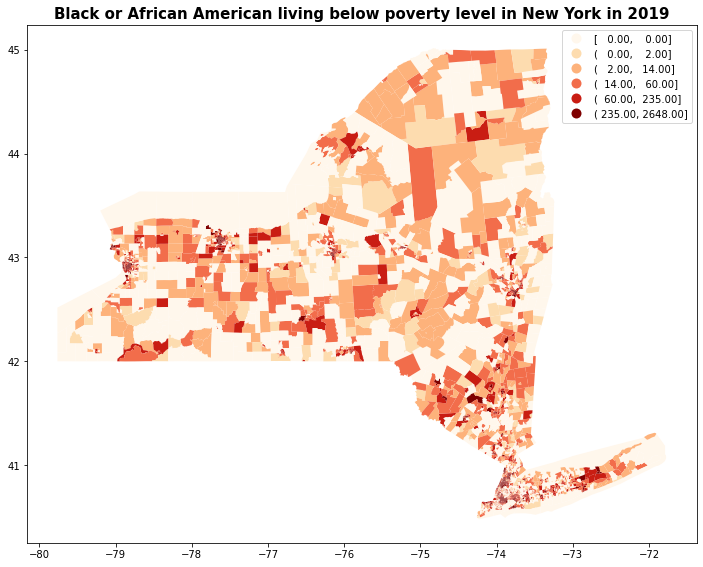

In [8]:
fig, ax = plt.subplots(figsize=(12, 12))
join.plot(ax = ax, column='Population below poverty level - Black or African American alone', 
          scheme='quantiles', k = 6, cmap='OrRd', legend=True)
ax.set_title('Black or African American living below poverty level in New York in 2019', fontweight='bold', size=15)

<br>
You can also sort the table by values in the column of interest using `sort_values()` method. 

- The `sort_values()` method is called from the joined table ('join').
- The sorting is based on a column of your choice. Here, we are interested in 'Population below poverty level - Black or African American alone' (by ='Population below poverty level - Black or African American alone').
- Sort values in descending order (ascending = False).
<br>

In [23]:
sorted = join.sort_values(by ='Population below poverty level - Black or African American alone', ascending = False)
sorted.head()

STATEFP COUNTYFP TRACTCE        GEOID    NAME             NAMELSAD  \
2570      36      005  014701  36005014701  147.01  Census Tract 147.01   
2702      36      047  090800  36047090800     908     Census Tract 908   
4071      36      085  004000  36085004000      40      Census Tract 40   
2260      36      047  030700  36047030700     307     Census Tract 307   
2167      36      047  035900  36047035900     359     Census Tract 359   

      MTFCC FUNCSTAT    ALAND  AWATER  ...      INTPTLON  \
2570  G5020        S   138921       0  ...  -073.9053292   
2702  G5020        S   296447       0  ...  -073.9047719   
4071  G5020        S  1192751       0  ...  -074.0808954   
2260  G5020        S   266959       0  ...  -073.9262196   
2167  G5020        S   183572       0  ...  -073.9238643   

                                               geometry  \
2570  POLYGON ((-73.90815 40.83490, -73.90740 40.836...   
2702  POLYGON ((-73.90788 40.67357, -73.90747 40.673...   
4071  POLYGON ((-74.09038 40.60916, -74.09011 40.609...   
2260  POLYGON ((-73.93053 40.67504, -73.93046 40.675...   
2167  POLYGON ((-73.92557 40.66871, -73.92549 40.669...   

                             Geographic Area Name  \
2570  Census Tract 147.01, Bronx County, New York   
2702     Census Tract 908, Kings County, New York   
4071   Census Tract 40, Richmond County, New York   
2260     Census Tract 307, Kings County, New York   
2167     Census Tract 359, Kings County, New York   

     Population below poverty level - Total  \
2570                                   4114   
2702                                   3891   
4071                                   3631   
2260                                   2774   
2167                                   2332   

      Population below poverty level - White alone  \
2570                                           250   
2702                                           805   
4071                                           861   
2260                                           115   
2167                                           131   

      Population below poverty level - Black or African American alone  \
2570                                               2648                  
2702                                               2482                  
4071                                               2402                  
2260                                               2238                  
2167                                               2100                  

      Population below poverty level - American Indian and Alaska Native alone  \
2570                                                  0                          
2702                                                 22                          
4071                                                  0                          
2260                                                  0                          
2167                                                  0                          

      Population below poverty level - Asian alone  \
2570                                             0   
2702                                           119   
4071                                            92   
2260                                             0   
2167                                            11   

      Population below poverty level - Native Hawaiian and Other Pacific Islander alone  \
2570                                                  0                                   
2702                                                  0                                   
4071                                                  0                                   
2260                                                  0                                   
2167                                                  0                                   

      Population below poverty level - Some other race alone  
2570                                  

In conclusion, we can see that in the choropleth map accompanied with the sorted table above, Kings County concentrates many census tracts that have a large number of Black and African American living below poverty level in 2019.